In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii 

In [2]:
tab = astropy.io.ascii.read("PS_2023.01.28_19.18.04.csv")

In [3]:
transit_period = []
transit_axis = []
transit_mass = []
for n,item in enumerate(tab["pl_orbper"]):
    if tab["discoverymethod"][n] == "Transit":
        transit_period.append(item)
        transit_axis.append(tab["pl_orbsmax"][n])
        transit_mass.append(tab["pl_bmasse"][n])

transit_radius = []
for n,item in enumerate(tab["pl_rade"]):
    if tab["discoverymethod"][n] == "Transit":
        transit_radius.append(item)
        
rv_period = []
rv_axis = []
rv_mass = []
for n,item in enumerate(tab["pl_orbper"]):
    if tab["discoverymethod"][n] == "Radial Velocity":
        rv_period.append(item)
        rv_axis.append(tab["pl_orbsmax"][n])
        rv_mass.append(tab["pl_bmasse"][n])

rv_radius = []
for n,item in enumerate(tab["pl_rade"]):
    if tab["discoverymethod"][n] == "Radial Velocity":
        rv_radius.append(item)
        
image_period = []
image_axis = []
image_mass = []
for n,item in enumerate(tab["pl_orbper"]):
    if tab["discoverymethod"][n] == "Imaging":
        image_period.append(item)
        image_axis.append(tab["pl_orbsmax"][n])
        image_mass.append(tab["pl_bmasse"][n])

image_radius = []
for n,item in enumerate(tab["pl_rade"]):
    if tab["discoverymethod"][n] == "Imaging":
        image_radius.append(item)
        
micro_period = []
micro_axis = []
micro_mass = []
for n,item in enumerate(tab["pl_orbper"]):
    if tab["discoverymethod"][n] == "Microlensing":
        micro_period.append(item)
        micro_axis.append(tab["pl_orbsmax"][n])
        micro_mass.append(tab["pl_bmasse"][n])

micro_radius = []
for n,item in enumerate(tab["pl_rade"]):
    if tab["discoverymethod"][n] == "Microlensing":
        micro_radius.append(item)
        
astro_period = []
astro_axis = []
astro_mass = []
for n,item in enumerate(tab["pl_orbper"]):
    if tab["discoverymethod"][n] == "Astrometry":
        astro_period.append(item)
        astro_axis.append(tab["pl_orbsmax"][n])
        astro_mass.append(tab["pl_bmasse"][n])

astro_radius = []
for n,item in enumerate(tab["pl_rade"]):
    if tab["discoverymethod"][n] == "Astrometry":
        astro_radius.append(item)

In [4]:
# Data on the planets of our Solar System
# Masses are in kilograms, times 10 to the 24th power
# Radii (equitorial) are in kilometers
# Orbital periods are in days
# Distance from the Sun (semimajor axis) is in AU (astronomical units)
# Average temperatures are in Kelvin

planet_data = {
    "Mercury": {"mass":0.33011,"radius":2439.7,"orbital period":88,"semimajor axis":0.387,"average temperature":440.15},
    "Venus": {"mass":4.8675,"radius":6051.8,"orbital period":225,"semimajor axis":0.723,"average temperature":737.15},
    "Earth": {"mass":5.9724,"radius":6378.137,"orbital period":365,"semimajor axis":1,"average temperature":288.15},
    "Mars": {"mass":0.64171,"radius":3396.2,"orbital period":687,"semimajor axis":1.524,"average temperature":208.15},
    "Jupiter": {"mass":1898.19,"radius":71492,"orbital period":4333,"semimajor axis":5.204,"average temperature":163.15},
    "Saturn": {"mass":568.34,"radius":60268,"orbital period":10756,"semimajor axis":9.583,"average temperature":133.15},
    "Uranus": {"mass":86.813,"radius":25559,"orbital period":30667,"semimajor axis":19.201,"average temperature":78.15},
    "Neptune": {"mass":102.413,"radius":24764,"orbital period":60190,"semimajor axis":30.048,"average temperature":73.15},}

In [5]:
# Creating a list of the masses of each planet.
all_radius = []
Earthrad = planet_data["Earth"]["radius"]

# Run through all the dictionary values, and extract the mass 
# of each planet from the list.

for planet in planet_data.values():
        all_radius.append(planet["radius"]/Earthrad)

In [6]:
# Creating a list of the semimajor axes of each planet.
all_period = []

# Run through all the dictionary values, and extract the semimajor axis of each planet, appending it to our list.

for planet in planet_data.values():
        all_period.append(planet["orbital period"])

In [7]:
# Creating a list of the distances of each planet.
all_distances = []

# Run through all the dictionary values, and extract the mass 
# of each planet from the list.

for planet in planet_data.values():
        all_distances.append(planet["semimajor axis"])

In [8]:
# Creating a list of the masses of each planet.
all_mass = []
Earthmass = planet_data["Earth"]["mass"]

# Run through all the dictionary values, and extract the mass 
# of each planet from the list.

for planet in planet_data.values():
        all_mass.append(planet["mass"]/Earthmass)

E:\ana\lib\site-packages\numpy\ma\core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


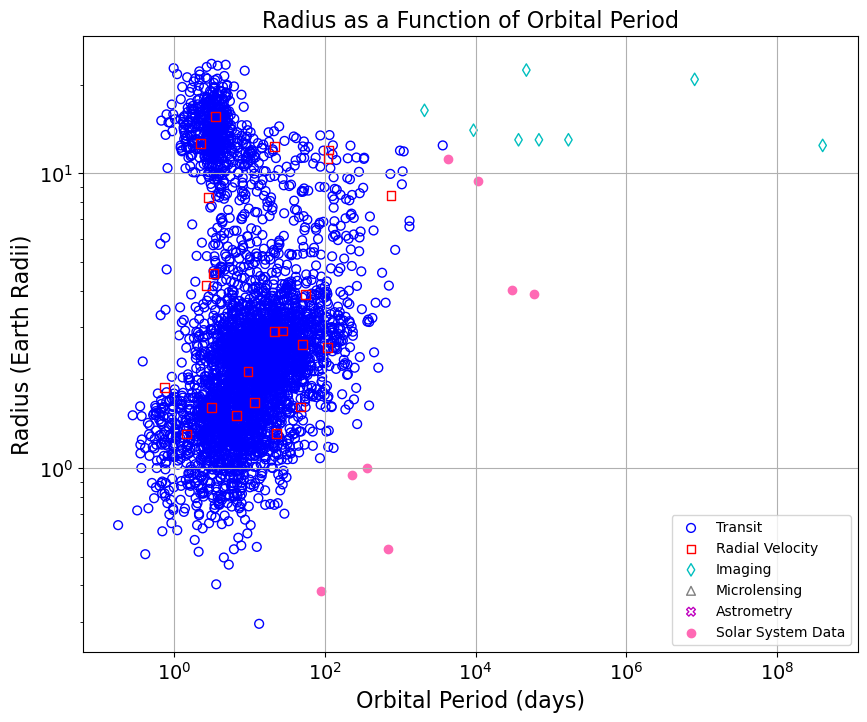

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
# Plotting both data sets with labels and markers
plt.grid()
plt.scatter(transit_period, transit_radius, label="Transit",s=40,facecolors='none', edgecolors='b')
plt.scatter(rv_period, rv_radius, label="Radial Velocity",s=40,facecolors='none', edgecolors='r',marker='s')
plt.scatter(image_period, image_radius, label="Imaging",s=40,facecolors='none', edgecolors='c',marker='d')
plt.scatter(micro_period, micro_radius, label="Microlensing",s=40,facecolors='none', edgecolors='gray',marker='^')
plt.scatter(astro_period, astro_radius, label="Astrometry",s=40,facecolors='none', edgecolors='m',marker='X')
plt.scatter(all_period, all_radius, label="Solar System Data",facecolors='hotpink')
plt.xscale("log")
plt.yscale("log")
# Setting plot limits
#ax.set_xlim(0.1, 100)
#ax.set_ylim(0.2, 50)
#Setting labels
ax.set_xlabel("Orbital Period (days)", fontsize=16)
ax.set_ylabel("Radius (Earth Radii)", fontsize=16)
ax.set_title("Radius as a Function of Orbital Period", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.legend()
plt.show()
fig.savefig('RadiusOrb.png', bbox_inches='tight')

In [10]:
print(all_distances)
print(all_radius)

[0.387, 0.723, 1, 1.524, 5.204, 9.583, 19.201, 30.048]
[0.3825098143862385, 0.9488350595165956, 1.0, 0.5324752353234181, 11.208915706890586, 9.44915419659377, 4.007283004425901, 3.882638456966353]


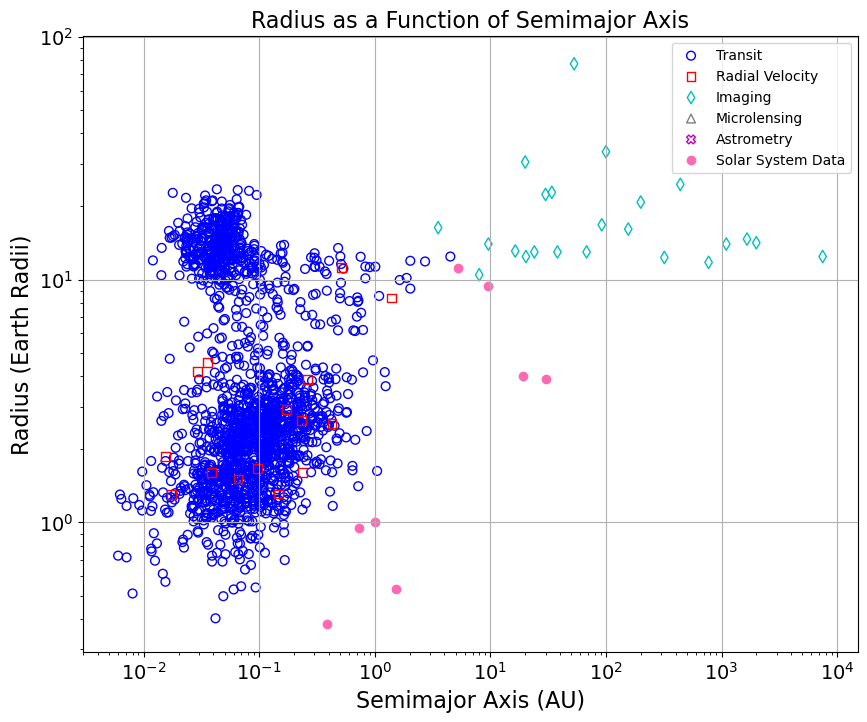

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
# Plotting both data sets with labels and markers
plt.grid()
plt.scatter(transit_axis, transit_radius, label="Transit",s=40,facecolors='none', edgecolors='b')
plt.scatter(rv_axis, rv_radius, label="Radial Velocity",s=40,facecolors='none', edgecolors='r',marker='s')
plt.scatter(image_axis, image_radius, label="Imaging",s=40,facecolors='none', edgecolors='c',marker='d')
plt.scatter(micro_axis, micro_radius, label="Microlensing",s=40,facecolors='none', edgecolors='gray',marker='^')
plt.scatter(astro_axis, astro_radius, label="Astrometry",s=40,facecolors='none', edgecolors='m',marker='X')
plt.scatter(all_distances, all_radius, label="Solar System Data",facecolors='hotpink')
# Setting plot limits
plt.xscale("log")
plt.yscale("log")
#ax.set_xlim(0.1, 100)
#ax.set_ylim(0.2, 50)
#Setting labels
ax.set_xlabel("Semimajor Axis (AU)", fontsize=16)
ax.set_ylabel("Radius (Earth Radii)", fontsize=16)
ax.set_title("Radius as a Function of Semimajor Axis", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.legend()
plt.show()
#fig.savefig('RadiusOrb.png', bbox_inches='tight')

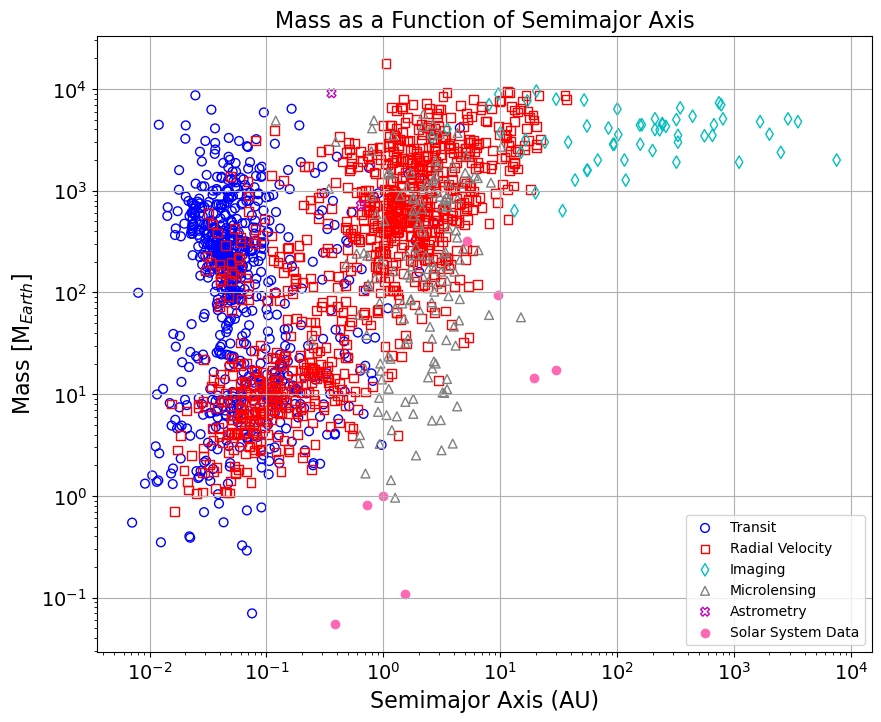

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
# Plotting both data sets with labels and markers
plt.grid()
plt.scatter(transit_axis, transit_mass, label="Transit",s=40,facecolors='none', edgecolors='b')
plt.scatter(rv_axis, rv_mass, label="Radial Velocity",s=40,facecolors='none', edgecolors='r',marker='s')
plt.scatter(image_axis, image_mass, label="Imaging",s=40,facecolors='none', edgecolors='c',marker='d')
plt.scatter(micro_axis, micro_mass, label="Microlensing",s=40,facecolors='none', edgecolors='gray',marker='^')
plt.scatter(astro_axis, astro_mass, label="Astrometry",s=40,facecolors='none', edgecolors='m',marker='X')
plt.scatter(all_distances, all_mass, label="Solar System Data",facecolors='hotpink')
# Setting plot limits
plt.xscale("log")
plt.yscale("log")
#ax.set_xlim(0.1, 100)
#ax.set_ylim(0.2, 50)
#Setting labels
ax.set_xlabel("Semimajor Axis (AU)", fontsize=16)
ax.set_ylabel("Mass [M$_{Earth}$]", fontsize=16)
ax.set_title("Mass as a Function of Semimajor Axis", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.legend()
plt.show()
#fig.savefig('RadiusOrb.png', bbox_inches='tight')

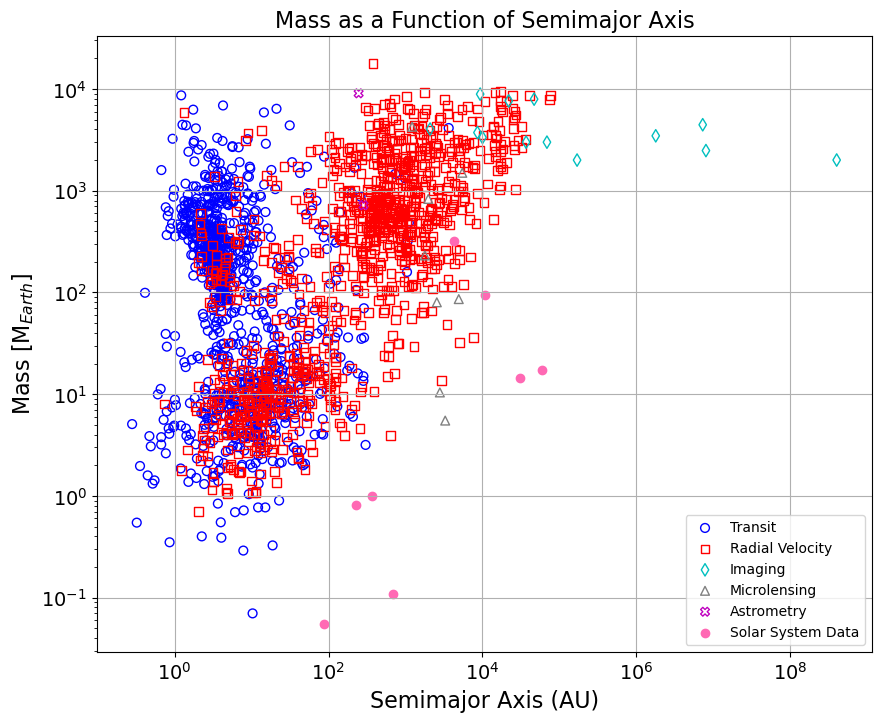

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
# Plotting both data sets with labels and markers
plt.grid()
plt.scatter(transit_period, transit_mass, label="Transit",s=40,facecolors='none', edgecolors='b')
plt.scatter(rv_period, rv_mass, label="Radial Velocity",s=40,facecolors='none', edgecolors='r',marker='s')
plt.scatter(image_period, image_mass, label="Imaging",s=40,facecolors='none', edgecolors='c',marker='d')
plt.scatter(micro_period, micro_mass, label="Microlensing",s=40,facecolors='none', edgecolors='gray',marker='^')
plt.scatter(astro_period, astro_mass, label="Astrometry",s=40,facecolors='none', edgecolors='m',marker='X')
plt.scatter(all_period, all_mass, label="Solar System Data",facecolors='hotpink')
# Setting plot limits
plt.xscale("log")
plt.yscale("log")
#ax.set_xlim(0.1, 100)
#ax.set_ylim(0.2, 50)
#Setting labels
ax.set_xlabel("Semimajor Axis (AU)", fontsize=16)
ax.set_ylabel("Mass [M$_{Earth}$]", fontsize=16)
ax.set_title("Mass as a Function of Semimajor Axis", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.legend()
plt.show()
#fig.savefig('RadiusOrb.png', bbox_inches='tight')